# GBSV Minichallenge Griechenland
## Steckbrief
- Name: Griechenland
- Einwohner: 10.5 Mio
- Hauptstadt: Athen
- Fläche: 132.000 km²
- Währung: Euro
- Sprache: Griechisch
- Besonderheiten: Griechenland ist bekannt für seine antike Kultur und seine zahlreichen Inseln. Die Akropolis in Athen ist ein bekanntes Wahrzeichen.

## Bilderauswahl
### Akropolis
Die Akropolis ist ein antikes Bauwerk in Athen und ein bekanntes Wahrzeichen Griechenlands. Ich habe dieses Bild ausgewählt, da es viele Strukturen enthält, welche wichtig sind für LE2. 
![Akropolis](Akropolis.jpg)

### Santorin
Santorin ist eine Inselgruppe im Süden des Ägäischen Meeres. Die Inseln sind bekannt für ihre weißen Häuser und die blauen Dächer. Ich habe dieses Bild ausgewählt, da es die Farbenpracht der Inseln zeigt. Ich möchte im Rahmen des LE1 mit den Farben und Kontrasten dieses Bildes arbeiten.
![Santorin](santorini.jpg)

## Signalauswahl
### Nationalhymne Griechenlands
Die Nationalhymne Griechenlands ist das "Hymn to Liberty". Ich habe dieses Signal ausgewählt, da es einen bezug zu Griechenland hat und ich mit diesem Signal die Aufgaben der Signalverarbeitung bearbeiten kann.

In [ ]:
from IPython.display import Audio
from IPython.display import display

display(Audio('gr.mp3', autoplay=False))

## LE1
### 1.1 Bildeigenschaften Santorini

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bild laden
img = cv2.imread('santorini.jpg')

# Bild anzeigen
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Santorini')

In [ ]:
img.shape

Das Bild hat eine Auflösung von 980 x 653 Pixeln und besteht aus 3 Farbkanälen (RGB).

In [ ]:
# Histogram
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.legend(['Blue', 'Green', 'Red'])
plt.show()

In diesem Histogram ist zu erkennen, dass die Hauptfarbe des Bildes blau ist. Das ganze Bild hat einen Blaustich. Zusammen mit den Grünen Farbtönen ergibt es ebenfalls noch einen türkisen Farbton.
Ein Histogram eignet sich gut um die Farbverteilung in einem Bild zu analysieren.


#### Kontrastanpassung 

In [ ]:
from skimage import io


def kontrastAnpassung(img, änderungsfaktor):
    durchschnitt = img.mean()
    neuesBild = np.clip(((img - durchschnitt) * änderungsfaktor) + durchschnitt, 0, 255).astype(np.uint8)
    return neuesBild


# Bilder anzeigen
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
ax[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title('Original')
ax[0, 0].axis('off')

ax[0, 1].imshow(cv2.cvtColor(kontrastAnpassung(img, 0.5), cv2.COLOR_BGR2RGB))
ax[0, 1].set_title('Kontrastangepasst, 0.5')
ax[0, 1].axis('off')

ax[1, 0].imshow(cv2.cvtColor(kontrastAnpassung(img, 1.5), cv2.COLOR_BGR2RGB))
ax[1, 0].set_title('Kontrastangepasst, 1.5')
ax[1, 0].axis('off')

ax[1, 1].imshow(cv2.cvtColor(kontrastAnpassung(img, 2), cv2.COLOR_BGR2RGB))
ax[1, 1].set_title('Kontrastangepasst, 2')
ax[1, 1].axis('off')

plt.show()

In [ ]:
#Histogramm für alle Bilder
color = ('b', 'g', 'r')

fig, ax = plt.subplots(2, 2, figsize=(20, 15))
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    ax[0, 0].plot(histr, color=col)
    ax[0, 0].set_title('Original')
ax[0, 0].legend(['Blue', 'Green', 'Red'])

for i, col in enumerate(color):
    histr = cv2.calcHist([kontrastAnpassung(img, 0.5)], [i], None, [256], [0, 256])
    ax[0, 1].plot(histr, color=col)
    ax[0, 1].set_title('Kontrastangepasst, 0.5')
ax[0, 1].legend(['Blue', 'Green', 'Red'])

for i, col in enumerate(color):
    histr = cv2.calcHist([kontrastAnpassung(img, 1.5)], [i], None, [256], [0, 256])
    ax[1, 0].plot(histr, color=col)
    ax[1, 0].set_title('Kontrastangepasst, 1.5')
ax[1, 0].legend(['Blue', 'Green', 'Red'])

for i, col in enumerate(color):
    histr = cv2.calcHist([kontrastAnpassung(img, 2)], [i], None, [256], [0, 256])
    ax[1, 1].plot(histr, color=col)
    ax[1, 1].set_title('Kontrastangepasst, 2')
ax[1, 1].legend(['Blue', 'Green', 'Red'])
plt.show()

Beschreibung:


#### Farbsättigung

In [ ]:
def farbsättigung(img: np.ndarray, faktor: float) -> np.ndarray:
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype=np.float64)
    hsv[:, :, 1] = hsv[:, :, 1] * faktor
    hsv[:, :, 1] = np.clip(hsv[:, :, 1], 0, 255)
    img = cv2.cvtColor(np.array(hsv, dtype=np.uint8), cv2.COLOR_HSV2BGR)
    return img

In [ ]:
img = cv2.imread('santorini.jpg')

# Bilder anzeigen
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
ax[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title('Original')
ax[0, 0].axis('off')

ax[0, 1].imshow(cv2.cvtColor(farbsättigung(img, 0), cv2.COLOR_BGR2RGB))
ax[0, 1].set_title('Farbsättigung, 0')
ax[0, 1].axis('off')

ax[1, 0].imshow(cv2.cvtColor(farbsättigung(img, 0.5), cv2.COLOR_BGR2RGB))
ax[1, 0].set_title('Farbsättigung, 0.5')
ax[1, 0].axis('off')

ax[1, 1].imshow(cv2.cvtColor(farbsättigung(img, 2), cv2.COLOR_BGR2RGB))
ax[1, 1].set_title('Farbsättigung, 2')
ax[1, 1].axis('off')

plt.show()

In [ ]:
# Histogramm für alle Bilder
color = ('b', 'g', 'r')

fig, ax = plt.subplots(2, 2, figsize=(20, 15))
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    ax[0, 0].plot(histr, color=col)
    ax[0, 0].set_title('Original')
ax[0, 0].legend(['Blue', 'Green', 'Red'])

for i, col in enumerate(color):
    histr = cv2.calcHist([farbsättigung(img, 0)], [i], None, [256], [0, 256])
    ax[0, 1].plot(histr, color=col)
    ax[0, 1].set_title('Farbsättigung, 0')
ax[0, 1].legend(['Blue', 'Green', 'Red'])

for i, col in enumerate(color):
    histr = cv2.calcHist([farbsättigung(img, 0.5)], [i], None, [256], [0, 256])
    ax[1, 0].plot(histr, color=col)
    ax[1, 0].set_title('Farbsättigung, 0.5')
ax[1, 0].legend(['Blue', 'Green', 'Red'])

for i, col in enumerate(color):
    histr = cv2.calcHist([farbsättigung(img, 2)], [i], None, [256], [0, 256])
    ax[1, 1].plot(histr, color=col)
    ax[1, 1].set_title('Farbsättigung, 2')
ax[1, 1].legend(['Blue', 'Green', 'Red'])

plt.show()

Beschreibung:

### 1.1 Bildeigenschaften Akropolis

In [ ]:
# Bild laden
img = cv2.imread('Akropolis.jpg')

# Bild anzeigen
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Akropolis')
img.shape

In [ ]:
# Histogram
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.legend(['Blue', 'Green', 'Red'])
plt.show()

#### Kontrastanpassung

In [ ]:
def kontrastAnpassung(img, änderungsfaktor):
    durchschnitt = img.mean()
    neuesBild = np.clip(((img - durchschnitt) * änderungsfaktor) + durchschnitt, 0, 255).astype(np.uint8)
    return neuesBild

In [ ]:
# Bilder anzeigen
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
ax[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title('Original')
ax[0, 0].axis('off')

ax[0, 1].imshow(cv2.cvtColor(kontrastAnpassung(img, 0.5), cv2.COLOR_BGR2RGB))
ax[0, 1].set_title('Kontrastangepasst, 0.5')
ax[0, 1].axis('off')

ax[1, 0].imshow(cv2.cvtColor(kontrastAnpassung(img, 1.5), cv2.COLOR_BGR2RGB))
ax[1, 0].set_title('Kontrastangepasst, 1.5')
ax[1, 0].axis('off')

ax[1, 1].imshow(cv2.cvtColor(kontrastAnpassung(img, 2), cv2.COLOR_BGR2RGB))
ax[1, 1].set_title('Kontrastangepasst, 2')
ax[1, 1].axis('off')

plt.show()

In [ ]:
plt.show()
#Histogramm für alle Bilder
color = ('b', 'g', 'r')

fig, ax = plt.subplots(2, 2, figsize=(20, 15))
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    ax[0, 0].plot(histr, color=col)
    ax[0, 0].set_title('Original')
ax[0, 0].legend(['Blue', 'Green', 'Red'])

for i, col in enumerate(color):
    histr = cv2.calcHist([kontrastAnpassung(img, 0.5)], [i], None, [256], [0, 256])
    ax[0, 1].plot(histr, color=col)
    ax[0, 1].set_title('Kontrastangepasst, 0.5')
ax[0, 1].legend(['Blue', 'Green', 'Red'])

for i, col in enumerate(color):
    histr = cv2.calcHist([kontrastAnpassung(img, 1.5)], [i], None, [256], [0, 256])
    ax[1, 0].plot(histr, color=col)
    ax[1, 0].set_title('Kontrastangepasst, 1.5')
ax[1, 0].legend(['Blue', 'Green', 'Red'])

for i, col in enumerate(color):
    histr = cv2.calcHist([kontrastAnpassung(img, 2)], [i], None, [256], [0, 256])
    ax[1, 1].plot(histr, color=col)
    ax[1, 1].set_title('Kontrastangepasst, 2')
ax[1, 1].legend(['Blue', 'Green', 'Red'])
plt.show()

#### Farbsättigung

In [ ]:
# Bilder anzeigen
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
ax[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title('Original')
ax[0, 0].axis('off')

ax[0, 1].imshow(cv2.cvtColor(farbsättigung(img, 0.5), cv2.COLOR_BGR2RGB))
ax[0, 1].set_title('Farbsättigung, 0.5')
ax[0, 1].axis('off')

ax[1, 0].imshow(cv2.cvtColor(farbsättigung(img, 1.5), cv2.COLOR_BGR2RGB))
ax[1, 0].set_title('Farbsättigung, 1.5')
ax[1, 0].axis('off')

ax[1, 1].imshow(cv2.cvtColor(farbsättigung(img, 1.99), cv2.COLOR_BGR2RGB))
ax[1, 1].set_title('Farbsättigung, 2')
ax[1, 1].axis('off')

plt.show()

In [ ]:
# Histogramm für alle Bilder
color = ('b', 'g', 'r')

fig, ax = plt.subplots(2, 2, figsize=(20, 15))
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    ax[0, 0].plot(histr, color=col)
    ax[0, 0].set_title('Original')
ax[0, 0].legend(['Blue', 'Green', 'Red'])

for i, col in enumerate(color):
    histr = cv2.calcHist([farbsättigung(img, 0.5)], [i], None, [256], [0, 256])
    ax[0, 1].plot(histr, color=col)
    ax[0, 1].set_title('Farbsättigung, 0.5')
ax[0, 1].legend(['Blue', 'Green', 'Red'])

for i, col in enumerate(color):
    histr = cv2.calcHist([farbsättigung(img, 1.5)], [i], None, [256], [0, 256])
    ax[1, 0].plot(histr, color=col)
    ax[1, 0].set_title('Farbsättigung, 1.5')
ax[1, 0].legend(['Blue', 'Green', 'Red'])

for i, col in enumerate(color):
    histr = cv2.calcHist([farbsättigung(img, 1.99)], [i], None, [256], [0, 256])
    ax[1, 1].plot(histr, color=col)
    ax[1, 1].set_title('Farbsättigung, 2')
ax[1, 1].legend(['Blue', 'Green', 'Red'])

plt.show()

Beschreibung:

### 1.2 Signaleigeschaften



In [48]:
# Import National Anthem
from IPython.display import Audio
from IPython.display import display

display(Audio('gr.mp3', autoplay=False))

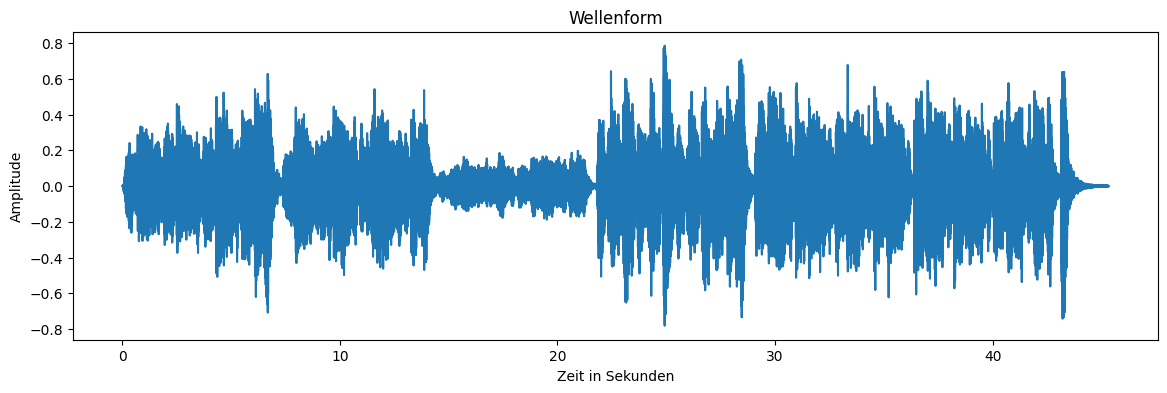

In [49]:
import librosa.display

y, sampleRate = librosa.load('gr.mp3', sr=44100)

t = np.arange(len(y)) / sampleRate

# Plot the signal:
plt.figure(figsize=(14, 4))
plt.plot(t, y)
plt.title('Wellenform')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Amplitude')
plt.show()


In [50]:
sampleRate

44100

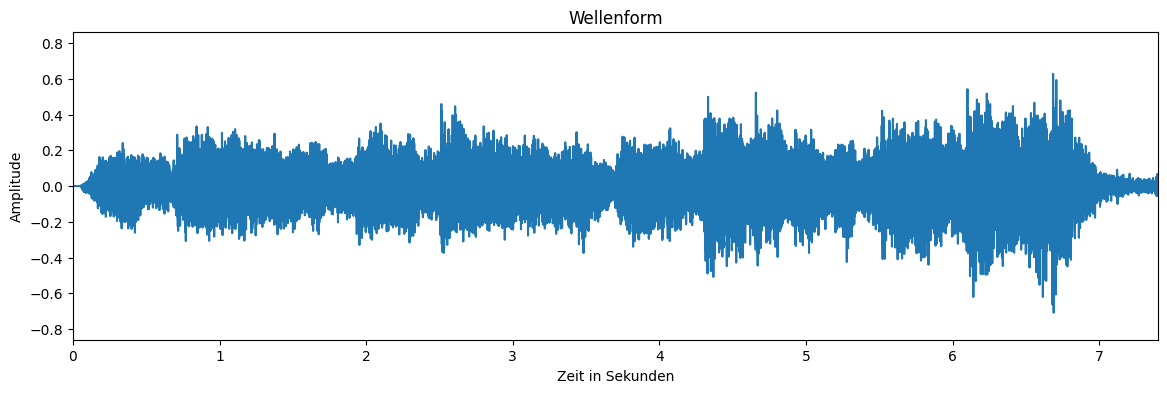

In [51]:
# Erste sieben Sekunden des Signals

# Plot the signal:
plt.figure(figsize=(14, 4))
plt.plot(t, y)
plt.title('Wellenform')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Amplitude')
plt.xlim([0, 7.4])
plt.show()

Ich möchte nun die Paukenschläge der ersten 7,4 Sekunden in der Nationalhymne entfernen. Dazu werde ich die Amplitude der Paukenschläge reduzieren.

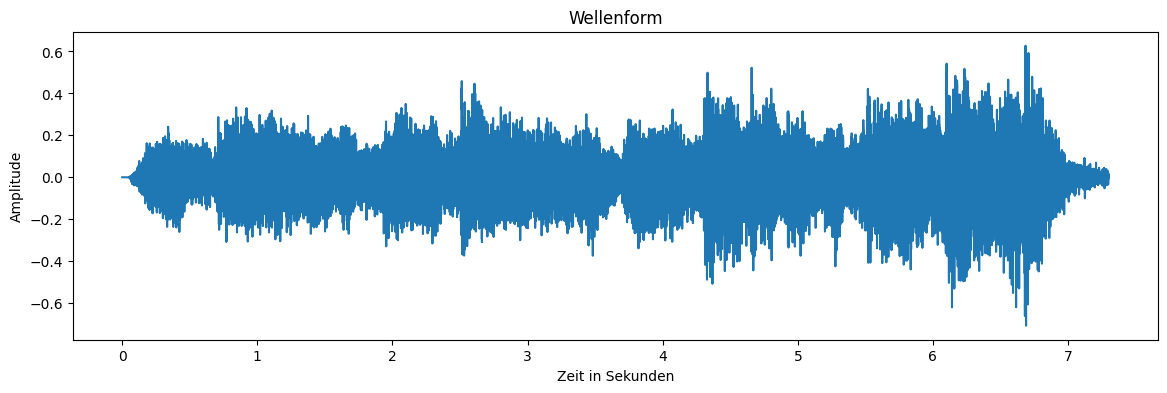

In [52]:
y_sevenSeconds = y[:int(sampleRate * 7.3)]
t_sevenSeconds = t[:int(sampleRate * 7.3)]

# Plot the signal:
plt.figure(figsize=(14, 4))
plt.plot(t_sevenSeconds, y_sevenSeconds)
plt.title('Wellenform')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Amplitude')
plt.show()

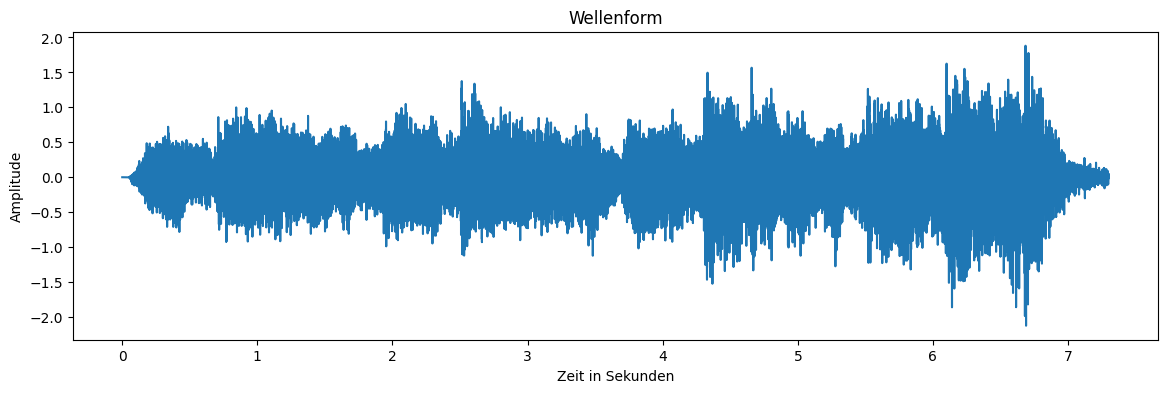

In [78]:
# Amplitude auf 10% reduzieren
y_sevenSecondsReduced = y_sevenSeconds * 3

# Plot the signal:
plt.figure(figsize=(14, 4))
plt.plot(t_sevenSeconds, y_sevenSecondsReduced)
plt.title('Wellenform')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Amplitude')
plt.show()

In [79]:
import sounddevice as sd

# Erzeuge ein Audiosignal
display(Audio(y_sevenSecondsReduced, rate=sampleRate))

Erstellen eines Fade-In Effektes

In [55]:
fade_in_effect = np.linspace(0, 1, int(4 * sampleRate))

y_fadeIn = np.copy(y_sevenSeconds)
y_fadeIn[:int(4 * sampleRate)] *= fade_in_effect

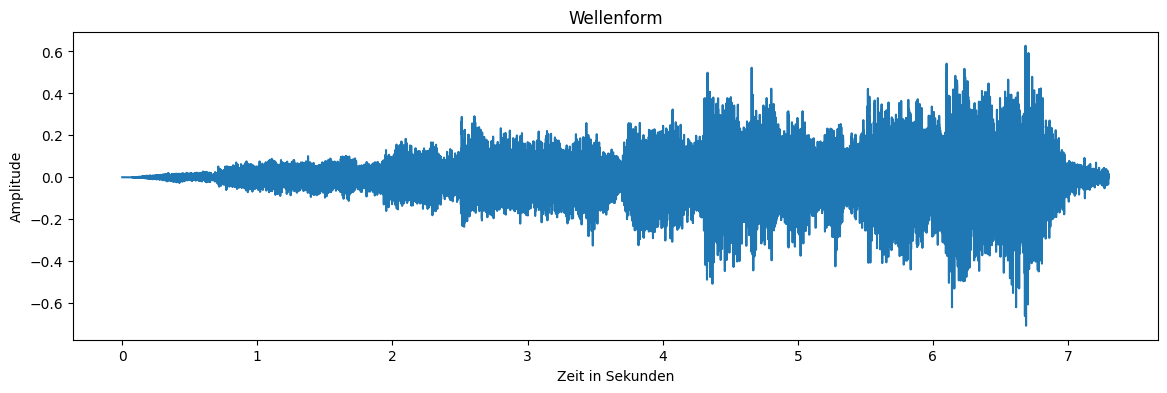

In [56]:
# Plot the signal:
plt.figure(figsize=(14, 4))
plt.plot(t_sevenSeconds, y_fadeIn)
plt.title('Wellenform')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Amplitude')
plt.show()

In [57]:
from IPython.display import Audio
from IPython.display import display

display(Audio(y_fadeIn, rate=sampleRate))

#### Phasenmanipulation

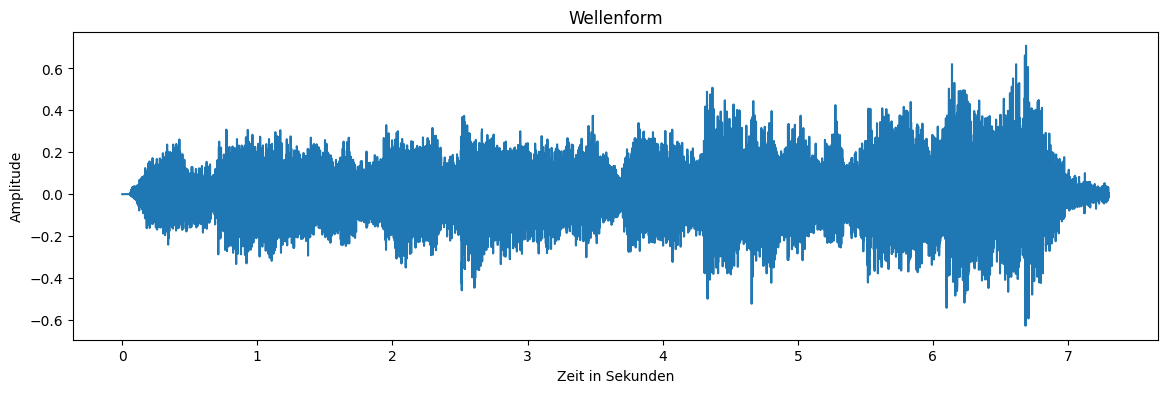

In [58]:
y_sevenSecondsInversed = y_sevenSeconds * -1

# Plot the signal:
plt.figure(figsize=(14, 4))
plt.plot(t_sevenSeconds, y_sevenSecondsInversed)
plt.title('Wellenform')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Amplitude')
plt.show()

In [59]:
display(Audio(y_sevenSecondsInversed, rate=sampleRate))

Phasenmanipulation: Vertikale Verschiebung


In [60]:
y_sevenSecondsShifted = np.abs(y_sevenSeconds)

display(Audio(y_sevenSecondsShifted, rate=sampleRate))

#### Analyse mit Fast Fourier Transformation

In [61]:
y_sevenSeconds_fft = np.fft.fft(y_sevenSeconds)

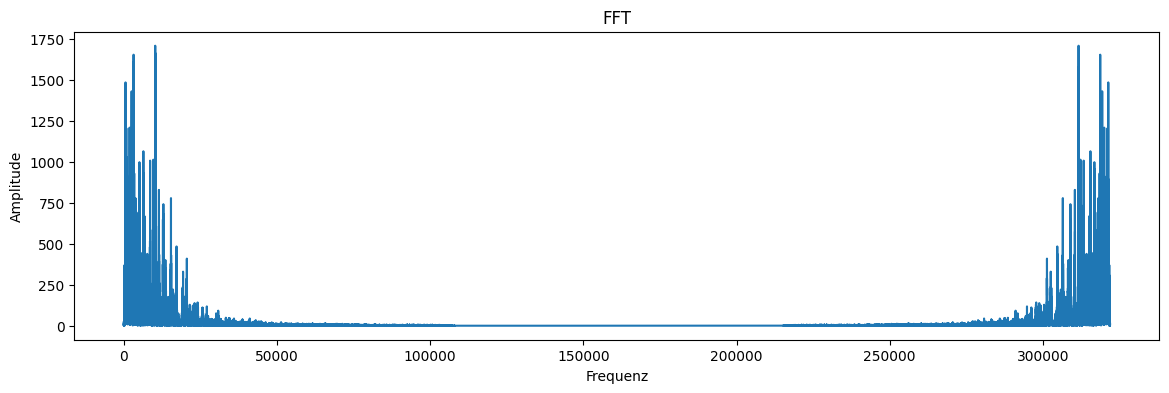

In [62]:
# Plot the FFT
plt.figure(figsize=(14, 4))
plt.plot(np.abs(y_sevenSeconds_fft))
plt.title('FFT')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')
plt.show()

Hier sind die Frequenzen abgebildet. Die y-Achse zeigt die Häufigkeit der Frequenzen an. Die x-Achse zeigt die Frequenzen an.

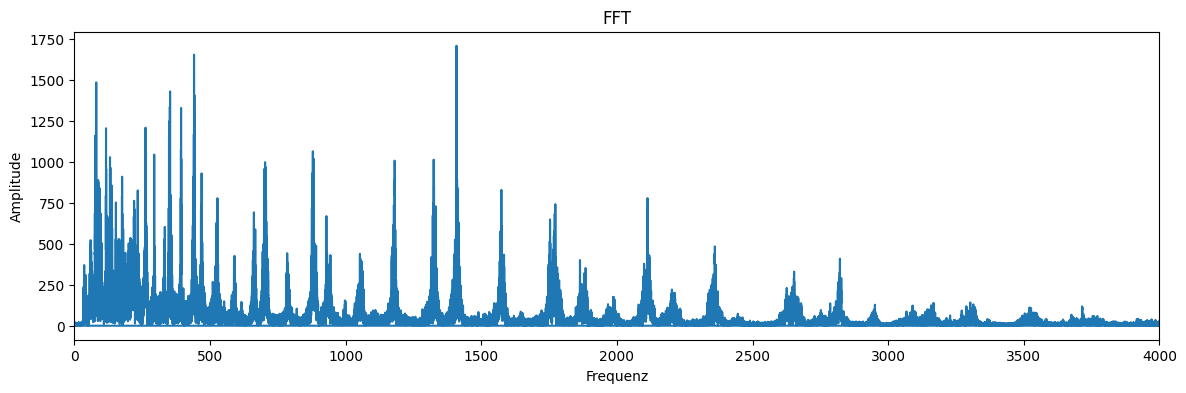

In [63]:
magnitude = np.abs(y_sevenSeconds_fft)
frequency = np.fft.fftfreq(len(magnitude), 1 / sampleRate)

# Plot the FFT
plt.figure(figsize=(14, 4))
plt.plot(frequency, magnitude)
plt.title('FFT')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')
plt.xlim([0, 4000])
plt.show()


Hier sind die verschiedenen Frequenzen abgebildet. Die Spitzen zeigen an welche Frequenzen am lautesten sind. 

In [64]:
def rekonstruiere_signal(original, anzahl_frequenzen):
    fft = np.fft.fft(original)
    magnitude = np.abs(fft)
    top_indices = np.argsort(magnitude)[-anzahl_frequenzen:]
    fft_filtered = np.zeros_like(fft)
    for index in top_indices:
        fft_filtered[index] = fft[index]
        if index != 0:
            fft_filtered[-index] = fft[-index]
    y_filtered = np.fft.ifft(fft_filtered)
    y_filtered_real = np.real(y_filtered)
    return y_filtered_real


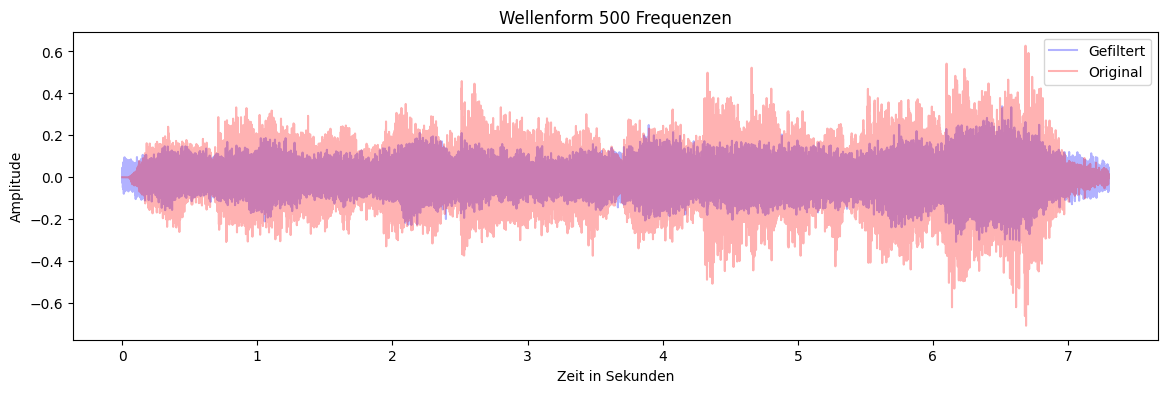

In [65]:
# Plot the filtered signal:
rekonstruierte_Frequenzen = 500
plt.figure(figsize=(14, 4))
plt.plot(t_sevenSeconds, rekonstruiere_signal(y_sevenSeconds, rekonstruierte_Frequenzen), c='blue', label='Gefiltert',
         alpha=0.3)
plt.plot(t_sevenSeconds, y_sevenSeconds, c='red', label='Original', alpha=0.3)
plt.title(f'Wellenform {rekonstruierte_Frequenzen} Frequenzen')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [66]:
display(Audio(rekonstruiere_signal(y_sevenSeconds, rekonstruierte_Frequenzen), rate=sampleRate))

Nun berechnen wir den Rekonsruktionsfehler für verschiedene Anzahlen von Frequenzen.

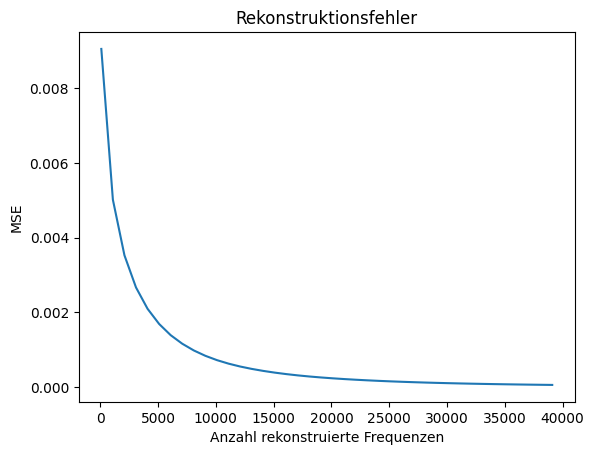

In [67]:
def mse(original, rekonstruiert):
    return np.mean((original - rekonstruiert) ** 2)


frequncies = np.arange(100, 40000, 1000)
errors = [mse(y_sevenSeconds, rekonstruiere_signal(y_sevenSeconds, f)) for f in frequncies]

# Plot the error:
plt.plot(frequncies, errors)
plt.title('Rekonstruktionsfehler')
plt.xlabel('Anzahl rekonstruierte Frequenzen')
plt.ylabel('MSE')
plt.show()

MSE erklären

### Nyqist Theorem

## LE2
### Filterung in der räumlichen Domäne

(702, 1000, 3)

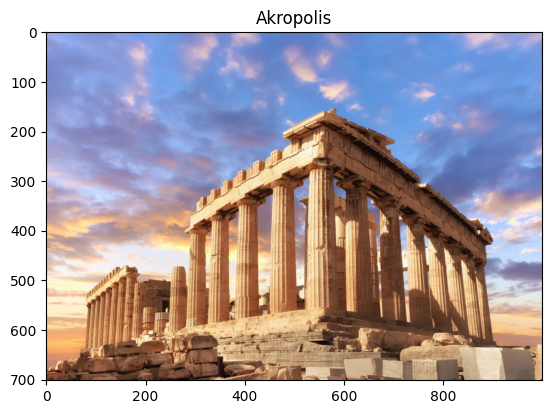

In [68]:
img = cv2.cvtColor(cv2.imread('Akropolis.jpg'), cv2.COLOR_BGR2RGB)
# Bild anzeigen
plt.imshow(img)
plt.title('Akropolis')
img.shape

In [69]:
def weichzeichner_library(img: np.ndarray, kernel_size: int, sigma: int) -> np.ndarray:
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)

In [70]:
def gaussian_kernel(kernel_size: int, sigma: float) -> np.ndarray:
    size = int(kernel_size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma ** 2)
    g = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2)) * normal
    return g / g.sum()

In [71]:
def weichzeichner_eigener_filter(img: np.ndarray, kernel_size: int, sigma: int) -> np.ndarray:
    image_height, image_width, image_color = img.shape
    edge = kernel_size // 2

    padded_img = np.pad(img, ((edge, edge), (edge, edge), (0, 0)), mode='constant')
    blurred_img = np.zeros_like(img)
    kernel = gaussian_kernel(kernel_size, sigma)

    for i in range(image_height):
        for j in range(image_width):
            for k in range(image_color):
                blurred_img[i, j, k] = np.sum(padded_img[i:i + kernel_size, j:j + kernel_size, k] * kernel)

    return blurred_img

(702, 1000, 3)

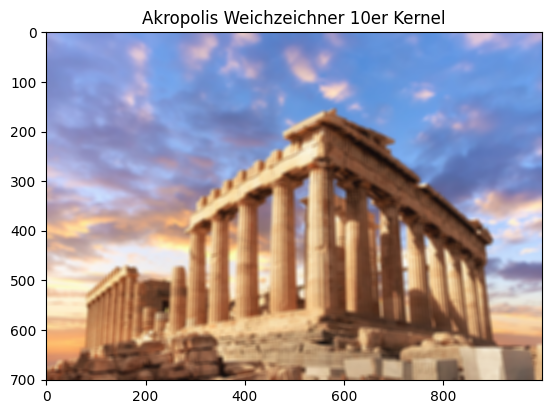

In [72]:
plt.imshow(weichzeichner_library(img, 9, 9))
plt.title(f'Akropolis Weichzeichner {10}er Kernel')
img.shape

(702, 1000, 3)

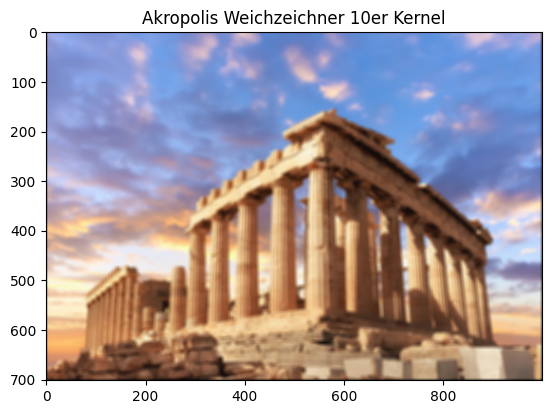

In [73]:
neuesBild = weichzeichner_eigener_filter(img, 9, 9)
plt.imshow(neuesBild)
plt.title(f'Akropolis Weichzeichner {10}er Kernel')
img.shape

In [74]:
neuesBild.shape

(702, 1000, 3)

In [75]:
unterschied = weichzeichner_library(img, 9, 9) - weichzeichner_eigener_filter(img, 9, 9)
print(f'Mittelwert: {unterschied.mean()}')

Mittelwert: 1.3079078822412156


Text(0.5, 1.0, 'Unterschied')

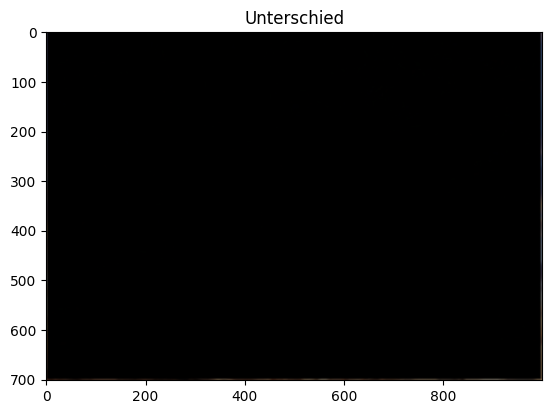

In [76]:
plt.imshow(unterschied)
plt.title('Unterschied')

Messmethoden

In [77]:
def ssim(img1: np.ndarray, img2: np.ndarray) -> float:
    
    return compare_ssim(img1, img2, multichannel=True)